# `scikit-learn` Pipelines
 
_Author: Carleton Smith_

<a id="learning-objectives"></a>
# Learning Objectives
- Review EDA and preprocessing in pandas
- Build a preprocessing pipeline in sklearn

<a id="top"></a>
# Lesson Guide
- [Acquire Data](#acquire)
- [Sklearn Pipelines](#pipelines)
- [Exploratory Data Analysis](#explore)
- [Preprocessing Pipeline](#preprocess)
- [Model Building](#modeling)

In [2]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

<a id="acquire"></a>
# Acquire Data

For this lessons, we will use the "Census Income" dataset, provided by the UCI Machine Learning Repository.

**Link**: https://archive.ics.uci.edu/ml/datasets/Adult

Our goal will be to predict if an individual's income exceeds \$50k per year based on census data.


**FEATURES**

1. `age`: continuous.
2. `workclass`: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
3. `fnlwgt`: continuous.
4. `education`: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
5. `education-num`: continuous.
6. `marital-status`: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
7. `occupation`: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
8. `race`: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
9. `sex`: Female, Male.
10. `capital-gain`: continuous.
11. `capital-loss`: continuous.
12. `hours-per-week`: continuous.
13. `native-country`: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.



In [4]:
adult = pd.read_csv('../datasets/adult.data.txt', na_values= ' ?', header=None)
adult.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
features = [
    'age',
    'workclass',
    'fnlwgt',
    'education',
    'education_num',
    'marital_status',
    'occupation',
    'relationship',
    'race',
    'sex',
    'capital_gain',
    'capital_loss',
    'hours_per_week',
    'native_country',
    'income',
]

**Challenge**: Add column headers using the `features` list defined above

In [6]:
adult.columns = features
adult.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


This is all the modifications we'll make at this time.

[Back to Top](#top)

<a id="pipelines"></a>
# Review: Sklearn Pipelines
---

Sklearn provides a [module](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.pipeline) for creating preprocessing pipelines. Some of you may be familiar. We will demonstrate Pipelines through an "end to end" project.

In [7]:
# import Pipeline class
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [8]:
X = adult[['age']].copy()
y = adult['fnlwgt']
display(X.head())
display(y.head())

,age
0,39
1,50
2,38
3,53
4,28


0     77516
1     83311
2    215646
3    234721
4    338409
Name: fnlwgt, dtype: int64

**Explanation**    
The sklearn pipeline takes a list of tuples. Each tuples is a step. The first element in a tuple is the name of the step and the second element is the class object that performs the step. Each step must have a `.fit` and a `.transform` method. The only exception to this is the last step, which can be a model class object (sklearn models do not have a `.transform` method).

The output of one step becomes the input of the next step, so order matters when constructing the pipeline.

**Example**:

In [9]:
# instantiate a pipeline with 2 steps
pipe = Pipeline([
    ('ss', StandardScaler()),
    ('lr', LinearRegression())
])

In [10]:
# fit the pipeline with data
pipe.fit(X, y)

Pipeline(memory=None,
     steps=[('ss', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lr', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

In [11]:
pipe.predict(X)

array([189530.24644427, 183006.2842647 , 190123.33391514, ...,
       178261.58449773, 199612.73344906, 181820.10932295])

[Back to Top](#top)

<a id="explore"></a>
# Exploratory Data Analysis
---

Let's run through some basic EDA procedures.

**Challenge**: Show how many missing values exist.

In [12]:
adult.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64

**Challenge**: What are the data types for each column?

In [13]:
adult.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

**Challenge**: what is the distribution of `income`? This is our target variable.

In [14]:
adult['income'].value_counts()

 <=50K    24720
 >50K      7841
Name: income, dtype: int64

**Challenge**: Create a plot of correlations

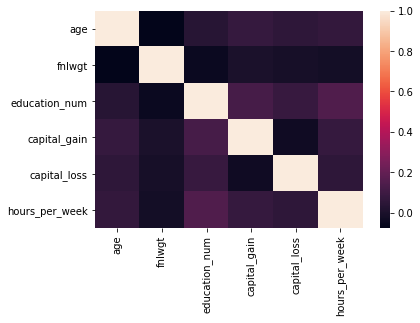

In [15]:
sns.heatmap(adult.corr());

**Challenge**: What are the distributions of the numeric data?

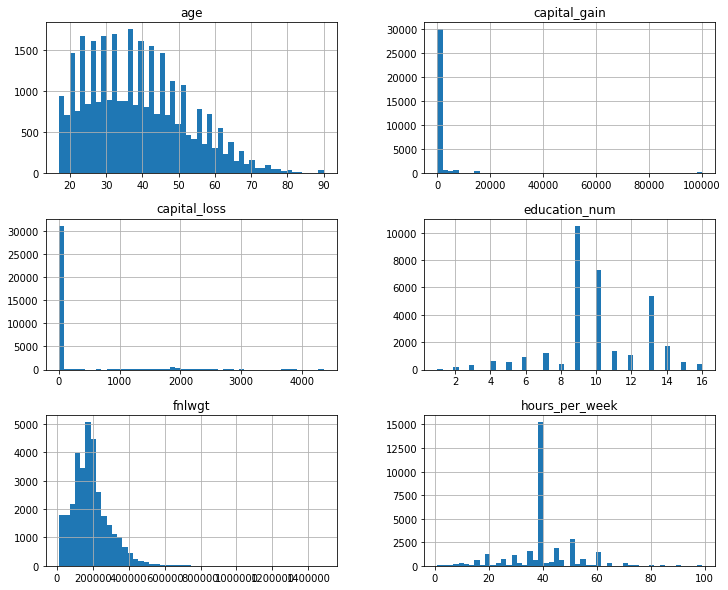

In [16]:
adult.hist(figsize=(12,10),bins=50);

[Back to Top](#top)

<a id="preprocess"></a>
# Preprocessing Pipeline
---

We will build this pipeline out sequentially.

**PREPROCESSING STEPS**
1. Separate target variable from features - sklearn requires this.
2. Peform a train-test split - Always do this before manipulating dataset
3. With training data:
    - **SEPARATE** numeric columns from categorical ones
    - **NUMERIC DF** preprocessing:
        - Replace nan values
        - Standardize features
   
    - **CATEGORICAL DF** preprocessing:
        - Replace nan values
        - Create dummy variables
    - **CONCATENATE** numeric and categorical DF
    - **ENCODE** target variable
<br>
<br>
4. Package these steps into a `Pipeline`

**Challenge**: Using a list comprehension, create a list of the numeric columns.

In [17]:
num_cols = [col for col in adult.columns if adult[col].dtype != 'object']

**Challenge**: Using a list comprehension, create a list of the numeric columns.

In [18]:
cat_cols = [col for col in adult.columns if col not in num_cols + ['income']]

**1. Separate target variable from features**

In [19]:
X = adult.drop('income', axis=1)
y = adult['income']

**Challenge**: Make a function that will extract out `X`. Call the function `feature_extractor`.

- The function should accept a DataFrame and return a DataFrame with the target variable removed.
- It's okay to hardcode the name of the target variable `income`.

In [20]:
def feature_extractor(df):
    return df.drop('income', axis=1)

**2. Peform a train-test split - Always do this before manipulating dataset**

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    stratify=y,
    random_state=24
)

**3. We will make functions for the following:**
    - **SEPARATE** numeric columns from categorical ones
    - **NUMERIC DF** preprocessing:
        - Replace nan values
        - Standardize features
   
    - **CATEGORICAL DF** preprocessing:
        - Replace nan values
        - Create dummy variables
    - **CONCATENATE** numeric and categorical DF
    - **ENCODE** target variable

**Challenge**: Create a function that will extract the categorical columns. Name this function `categorical_extractor`.

- The function should accept a DataFrame and return a DataFrame with only categorical variables.

In [23]:
def categorical_extractor(df):
    return df.select_dtypes(include=['object'])

**Challenge**: Create a function that will extract the numeric columns. Name this function `numeric_extractor`.

- The function should accept a DataFrame and return a DataFrame with only categorical variables.

In [24]:
def numeric_extractor(df):
    return df.select_dtypes(exclude=['object'])

The following function is provided for convenience. It will add column names to dummy variable columns.

In [25]:
def dummy_col_adder(array):
    dummy_cols = []
    for col, cat_set in zip(cat_cols, cat_pipe.named_steps['OneHotEncoder'].categories_):
        for cat in cat_set:
            dummy_cols.append(col+'_'+cat)
    return pd.DataFrame(array, columns=dummy_cols)

[Back to Top](#top)

### `FunctionTransformer`

Sklearn pipelines require every step to be a `class` object with a `.fit` and `.transform` method. In order to use the functions we defined above, we will need to conver them to a "transformer" class object. The `FunctionTransformer` is class is designed for doing exactly that.

**DEMO**: Use `numeric_extractor` to grab numeric columns. Then try doing the same task after converting it to a transformer.

In [26]:
from sklearn.preprocessing import FunctionTransformer

In [27]:
numeric_extractor(adult).head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40


In [28]:
num_transformer = FunctionTransformer(numeric_extractor, validate=False)
num_transformer.transform(adult).head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40


**Challenge**: Using the `num_transformer` defined above, build a pipeline for the numeric data. Call the pipeline `num_pipe`. The steps should include:

1. `num_transformer`
2. `SimpleImputer` (from sklearn.impute - use the `median` strategy)
3. `StandardScaler` (from sklearn.preprocessing)


In [29]:
from sklearn.impute import SimpleImputer

In [30]:
# make numeric pipe
num_pipe = Pipeline([
    ('numeric_transformer', num_transformer),
    ('num_im', SimpleImputer(strategy='median')),
    ('StandardScaler', StandardScaler())
])

In [31]:
num_pipe.fit_transform(X_train)

array([[-0.9248115 ,  0.01234365,  1.13367091, -0.14674936, -0.21471569,
        -0.84327852],
       [ 1.71248556,  2.16242727, -1.19858075, -0.14674936, -0.21471569,
        -1.57298583],
       [-1.14458626,  2.32985924, -0.42116353, -0.14674936, -0.21471569,
         0.6161361 ],
       ...,
       [ 0.39383703,  1.6965263 , -3.14212379, -0.14674936, -0.21471569,
        -0.03249262],
       [ 1.41945255,  0.03584754, -2.36470657, -0.14674936, -0.21471569,
        -0.60004275],
       [-1.29110276,  2.9788741 , -0.42116353, -0.14674936, -0.21471569,
        -0.03249262]])

#### We'll now build the pipeline for categorical data

1. Use `FunctionTransformer` to transform `categorical_extractor`
2. Use `FunctionTransformer` to transform `dummy_col_adder`
3. Build the categorical pipeline

For number 3, include the following steps:

- `cat_transformer`
- `SimpleImputer(strategy='most_frequent')`
- `OneHotEncoder(sparse=False, handle_unknown='ignore')`
- `dummy_col_transformer`

In [32]:
from sklearn.preprocessing import OneHotEncoder

In [33]:
# transform our two functions
cat_transformer = FunctionTransformer(categorical_extractor, validate=False)
dummy_col_transformer = FunctionTransformer(dummy_col_adder, validate=False)

In [34]:
cat_pipe = Pipeline([
    ('cat_transformer', cat_transformer),
    ('cat_im', SimpleImputer(strategy='most_frequent')),
    ('OneHotEncoder', OneHotEncoder(sparse=False, handle_unknown='ignore')),
#     ('dummy_col_transformer', dummy_col_transformer)
])

In [35]:
cat_pipe.fit(X_train)

Pipeline(memory=None,
     steps=[('cat_transformer', FunctionTransformer(accept_sparse=False, check_inverse=True,
          func=<function categorical_extractor at 0x1a19ace7b8>,
          inv_kw_args=None, inverse_func=None, kw_args=None,
          pass_y='deprecated', validate=False)), ('cat_im', SimpleImputer(copy=True, f...       dtype=<class 'numpy.float64'>, handle_unknown='ignore',
       n_values=None, sparse=False))])

In [36]:
cat_pipe.transform(X_train).shape

(22792, 99)

[Back to Top](#top)

### `FeatureUnion`

We now have two pipelines: `num_pipe` and `cat_pipe`. The each do their job and we can have them work in parallel. For this, we use the `FeatureUnion` class from the `pipeline` module. This will run each pipeline seperately and combine the results.

In [37]:
from sklearn.pipeline import FeatureUnion

In [38]:
# make FeatureUnion
feat_union = FeatureUnion([
    ('num_pipe', num_pipe),
    ('cat_pipe', cat_pipe)
])

In [39]:
feat_union.fit(X_train).transform(X_train)[:1]

array([[-0.9248115 ,  0.01234365,  1.13367091, -0.14674936, -0.21471569,
        -0.84327852,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0. 

Above, the first 6 items are from the numeric data. The remaining columns are dummy variables from the categorical columns. Finally, we combine this into one pipeline.

In [40]:
feature_pipe = Pipeline([
    ('feat_union', feat_union)
])

#### Use this pipeline to _fit_ and _transform_ `X_train`

In [41]:
# fit and transform training data
X_train_prepared = pd.DataFrame(
    feature_pipe.fit(X_train).transform(X_train),
    index=X_train.index,
    columns = num_cols + [col+ '_' + level.strip()
                          for col, cat in zip(cat_cols, cat_pipe.named_steps['OneHotEncoder'].categories_)
                          for level in cat])
X_train_prepared.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native_country_Portugal,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia
10348,-0.924812,0.012344,1.133671,-0.146749,-0.214716,-0.843279,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
11062,1.712486,2.162427,-1.198581,-0.146749,-0.214716,-1.572986,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
25734,-1.144586,2.329859,-0.421164,-0.146749,-0.214716,0.616136,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
401,-0.778295,-0.763740,-0.032455,-0.146749,-0.214716,-0.032493,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
28063,1.126420,1.600147,1.133671,0.844477,-0.214716,1.183686,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


**Challenge**: Use this fitted pipeline to transform `X_test`.

In [42]:
# transform testing data
X_test_prepared = pd.DataFrame(
    feature_pipe.transform(X_test),
    index=X_test.index,
    columns=num_cols + [col+ '_' + level.strip()
                          for col, cat in zip(cat_cols, cat_pipe.named_steps['OneHotEncoder'].categories_)
                          for level in cat])
X_test_prepared.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native_country_Portugal,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia
2093,0.906645,-0.129961,1.133671,-0.146749,-0.214716,0.535058,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
29473,-1.437619,1.329928,-1.198581,-0.146749,-0.214716,-0.032493,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
14123,0.174062,1.430095,-2.753415,-0.146749,-0.214716,-0.032493,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10193,0.906645,-1.536521,-0.421164,-0.146749,-0.214716,-0.032493,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
18789,0.320579,1.045784,-0.032455,-0.146749,-0.214716,-0.032493,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


**ENCODE TARGET VARIABLE**

The final step is to encode the target variable `income` to be numeric. For this, we'll use `LabelEncoder` from sklearn.preprocessing.

In [43]:
y_train[:5]

10348     <=50K
11062     <=50K
25734     <=50K
401       <=50K
28063      >50K
Name: income, dtype: object

**Challenge**: Use `LabelEncoder` to transform `y_train` so that "<50k" is 0 and ">=50k" is 1.

In [44]:
from sklearn.preprocessing import LabelEncoder

In [45]:
# fit and transform y_train
le = LabelEncoder()
y_train_encoded = pd.Series(le.fit_transform(y_train), index=y_train.index)
y_train_encoded[:5]

10348    0
11062    0
25734    0
401      0
28063    1
dtype: int64

Transform the test set:

In [46]:
# transform ONLY: y_test
y_test_encoded = pd.Series(le.transform(y_test), index=y_test.index)
y_test_encoded[:5]

2093     1
29473    0
14123    0
10193    0
18789    0
dtype: int64

[Back to Top](#top)

<a id="modeling"></a>
# Model Building
---

Now that our data is ready, we can move on to modeling.

**Challenge**: What is the first step of the modeling process?

ANSWER: Calculate the baseline.

In [47]:
y_test_encoded.value_counts()[0] / y_test_encoded.value_counts().sum()

0.7592384072064694

The most simple model possible is using the majority class (under \$50k) as the prediction for every value.

We would achieve 76\% accuracy if we did this. All future models must beat this baseline.

In [48]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [49]:
feature_pipe2 = Pipeline([
    ('feat_union', feat_union),
    ('gbt', GradientBoostingClassifier())
])

In [50]:
feature_pipe2.fit(X_train, y_train_encoded)

Pipeline(memory=None,
     steps=[('feat_union', FeatureUnion(n_jobs=None,
       transformer_list=[('num_pipe', Pipeline(memory=None,
     steps=[('numeric_transformer', FunctionTransformer(accept_sparse=False, check_inverse=True,
          func=<function numeric_extractor at 0x1a19ace1e0>,
          inv_kw_args=None, invers...    subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False))])

In [51]:
feature_pipe2.predict(X_test)

array([1, 0, 0, ..., 0, 0, 0])

In [52]:
params = {
    'feat_union__num_pipe__num_im__strategy': ['mean', 'median'],
    'gbt__n_estimators': [5, 50, 100],
    'gbt__learning_rate': np.linspace(0.01, 0.3, 3),
    'gbt__min_samples_leaf': [1,3,5],
}

In [53]:
rs = RandomizedSearchCV(feature_pipe2, param_distributions=params, cv=3, verbose=2)

In [54]:
rs.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] gbt__n_estimators=50, gbt__min_samples_leaf=5, gbt__learning_rate=0.155, feat_union__num_pipe__num_im__strategy=median 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  gbt__n_estimators=50, gbt__min_samples_leaf=5, gbt__learning_rate=0.155, feat_union__num_pipe__num_im__strategy=median, total=   3.0s
[CV] gbt__n_estimators=50, gbt__min_samples_leaf=5, gbt__learning_rate=0.155, feat_union__num_pipe__num_im__strategy=median 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.1s remaining:    0.0s


[CV]  gbt__n_estimators=50, gbt__min_samples_leaf=5, gbt__learning_rate=0.155, feat_union__num_pipe__num_im__strategy=median, total=   3.2s
[CV] gbt__n_estimators=50, gbt__min_samples_leaf=5, gbt__learning_rate=0.155, feat_union__num_pipe__num_im__strategy=median 
[CV]  gbt__n_estimators=50, gbt__min_samples_leaf=5, gbt__learning_rate=0.155, feat_union__num_pipe__num_im__strategy=median, total=   3.1s
[CV] gbt__n_estimators=100, gbt__min_samples_leaf=5, gbt__learning_rate=0.155, feat_union__num_pipe__num_im__strategy=median 
[CV]  gbt__n_estimators=100, gbt__min_samples_leaf=5, gbt__learning_rate=0.155, feat_union__num_pipe__num_im__strategy=median, total=   4.6s
[CV] gbt__n_estimators=100, gbt__min_samples_leaf=5, gbt__learning_rate=0.155, feat_union__num_pipe__num_im__strategy=median 
[CV]  gbt__n_estimators=100, gbt__min_samples_leaf=5, gbt__learning_rate=0.155, feat_union__num_pipe__num_im__strategy=median, total=   4.6s
[CV] gbt__n_estimators=100, gbt__min_samples_leaf=5, gbt__lea

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  1.2min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=Pipeline(memory=None,
     steps=[('feat_union', FeatureUnion(n_jobs=None,
       transformer_list=[('num_pipe', Pipeline(memory=None,
     steps=[('numeric_transformer', FunctionTransformer(accept_sparse=False, check_inverse=True,
          func=<function numeric_extractor at 0x1a19ace1e0>,
          inv_kw_args=None, invers...    subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False))]),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'feat_union__num_pipe__num_im__strategy': ['mean', 'median'], 'gbt__n_estimators': [5, 50, 100], 'gbt__learning_rate': array([0.01 , 0.155, 0.3  ]), 'gbt__min_samples_leaf': [1, 3, 5]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=2)